In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import collections

from crate.client import connect
conn = connect('localhost:4200')
cursor = conn.cursor()

cursor.execute('select distinct(statement) from benchmarks')
for (stmt, ) in cursor.fetchall():
    print(stmt)

select * from uservisits limit 10000
select * from uservisits limit 100
select count(*) from uservisits
select count("sourceIP") from uservisits
select * from uservisits limit 100000
select * from uservisits limit 10
select * from uservisits order by "adRevenue" limit 10
select count("cCode") from uservisits
select * from uservisits limit 1000
select extract(day from "visitDate"), count(*) from uservisits group by 1 order by 2 desc limit 20
select "cCode", count(*) from uservisits group by 1 order by 2 desc limit 20


<IPython.core.display.Javascript object>


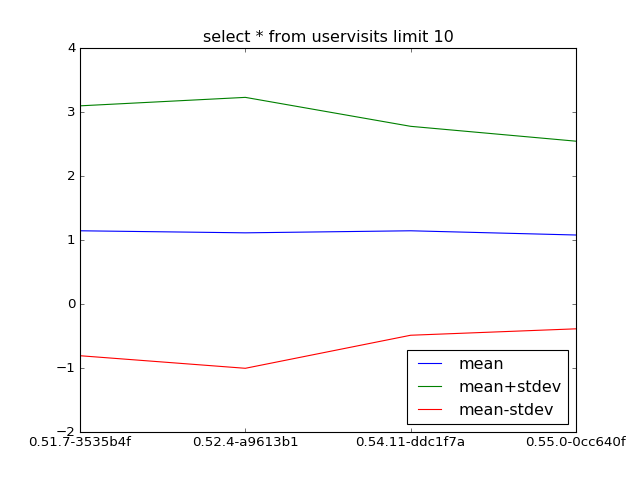

In [2]:
stmt = 'select * from uservisits limit 10'
cursor.execute("""
    select 
        version_info['number'] || '-' || substr(version_info['hash'], 0, 7),
        avg(runtime_stats['mean']),
        avg(runtime_stats['mean']) + avg(runtime_stats['stdev']),
        avg(runtime_stats['mean']) - avg(runtime_stats['stdev'])
    from 
        benchmarks
    where
        statement = ?
    group by 1
    order by 1
""", (stmt,))

rows = [row for row in cursor.fetchall()]
versions = [r[0] for r in rows]
plt.xticks(range(len(versions)), versions)
x = list(range(len(versions)))
plt.title(stmt)
plt.plot(x, [r[1] for r in rows], label='mean')
plt.plot(x, [r[2] for r in rows], label='mean+stdev')
plt.plot(x, [r[3] for r in rows], label='mean-stdev')
plt.legend(loc='best')